In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

In [2]:
df=pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [3]:
sns.set(rc={'figure.figsize':(10,5)})

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index(['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'volume of stocks vs time')

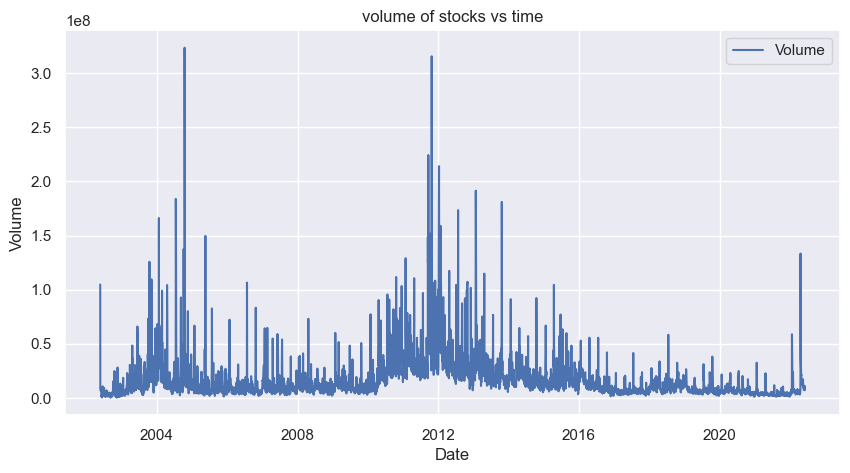

In [5]:
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
plt.title("volume of stocks vs time")


<Axes: title={'center': 'Netflix stocks'}, xlabel='Date'>

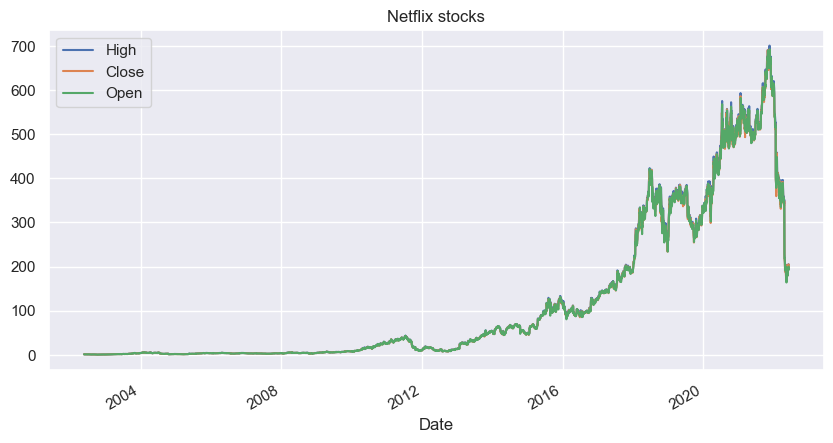

In [6]:
df.plot(y=['High','Close','Open'],title="Netflix stocks")

<Axes: xlabel='Date'>

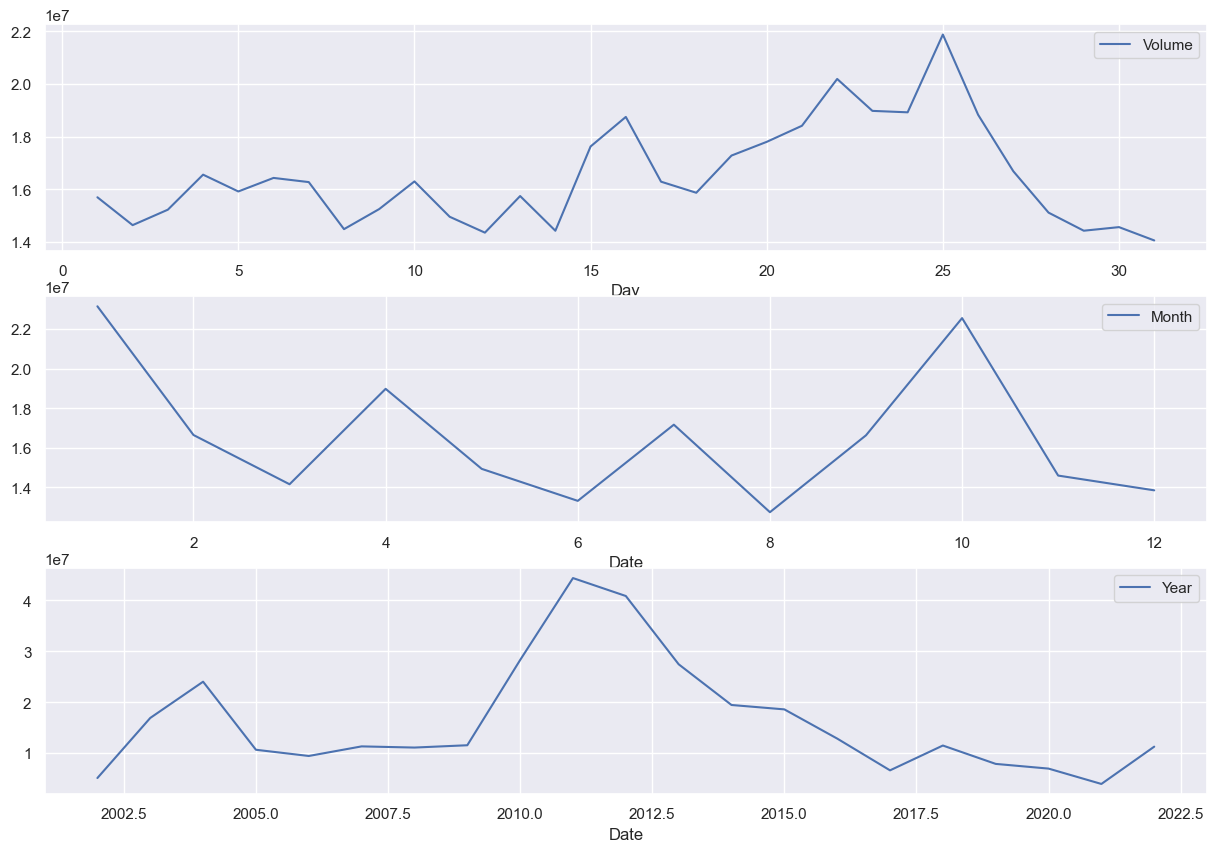

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y="Volume",ax=ax1,xlabel="Day")
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2,label="Month")
df.groupby(df.index.year).mean().plot(y="Volume",ax=ax3,label="Year")

In [8]:
a=df.sort_values(by='High',ascending=False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [9]:
b=df.sort_values(by='Low',ascending=True).head(5)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

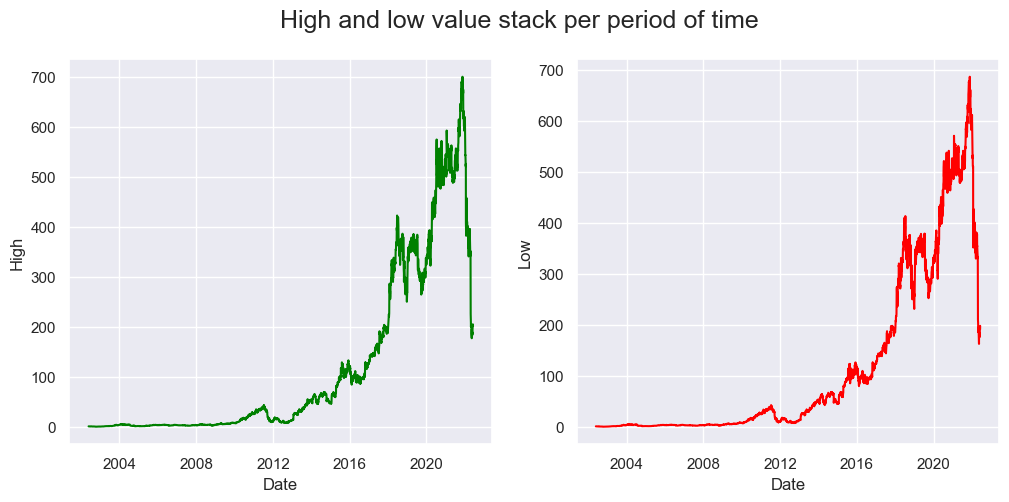

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle('High and low value stack per period of time',fontsize=18)
sns.lineplot(ax=axes[0],y=df['High'],x=df.index,color='green')
sns.lineplot(ax=axes[1],y=df['Low'],x=df.index,color='red')